In [17]:
using PyPlot
import CurveFit

In [2]:
sz = Float64[0.5 0; 
	     0 -0.5]
sp = Float64[0 1; 
	     0 0]
sm = sp'
one = eye(2)

Htwosite = 0.5 * (kron(sp,sm) + kron(sm,sp)) + kron(sz,sz)
@show size(Htwosite)
Hmat = reshape(Htwosite,4,4)
ev2 = eigfact(Hmat)
@show ev2[:values]



size(Htwosite) = (4,4)

4-element Array{Float64,1}:
 -0.75
  0.25
  0.25
  0.25


ev2[:values] = [-0.7499999999999994,0.25,0.25,0.25]


In [84]:
v =  [1 , 1]
M = [1 0 ;
     0 1]
for i = 1:10000
    v = M * v
    v = v/ norm(v)
end
@show v
@show(M * v)
@show v \ (M * v)
@show \(v, M * v)
@show eig(M)

v = [0.7071067811865476,0.7071067811865476]

([1.0,1.0],
2x2 Array{Float64,2}:
 -1.0  -0.0
 -0.0   1.0)


M * v = [0.7071067811865476,0.7071067811865476]
v \ (M * v) = [0.9999999999999997]
v \ (M * v) = [0.9999999999999997]
eig(M) = ([1.0,1.0],
[-1.0 -0.0
 -0.0 1.0])


In [2]:
sz = Float64[0.5 0; 
	     0 -0.5]
sp = Float64[0 1; 
	     0 0]
sm = sp'
one = eye(2)
# sz = sparse(sz)
# sp = sparse(sp)
# sm = sparse(sm)
# one = sparse(one)

Htwosite = 0.5 * (kron(sp,sm) + kron(sm,sp)) + kron(sz,sz)
Hmat = reshape(Htwosite,4,4)
ev2 = eigfact(Hmat)
# @show ev2[:values]

Hthreesite = kron(Htwosite,one) + kron(one,Htwosite)
Hmat = reshape(Hthreesite,8,8)
# @show Hmat
ev3 = eigfact(Hmat)
# @show ev3[:values]

mykron(a,b,c) = kron(a,kron(b,c))
mykron(a,b,c,d) = kron(a,kron(b,kron(c,d)))

Hfoursite = kron(Hthreesite,one) + mykron(one,one,Htwosite)
Hmat = reshape(Hfoursite,16,16)
ev4 = eigfact(Hmat)
# @show ev4[:values]

Hfivesite = kron(Hfoursite,one) + mykron(one,one,one,Htwosite)
Hmat = reshape(Hfivesite,32,32)
ev5 = eigfact(Hmat)
# @show ev5[:values][1:6]

Hn = cell(100)
Htwon = cell(100)
function getHkron(n)
    Hn[2] = 0.5 * (kron(sp,sm) + kron(sm,sp)) + kron(sz,sz)
    Htwon[2] = Hn[2]
    for k=3:n
	Htwon[k] = kron(one,Htwon[k-1])
	Hn[k] = kron(Hn[k-1],one) + Htwon[k]
    end
    Hn[n]
end

H5 = getHkron(5)
ev5 = eigfact(H5)
# @show ev5[:values][1:6]
flush(STDOUT)

In [4]:
sz = Float64[0.5 0; 
	     0 -0.5]
sp = Float64[0 1; 
	     0 0]
sm = sp'
one = eye(2)

sz = sparse(sz)
sp = sparse(sp)
sm = sparse(sm)
one = sparse(one)

Hn = cell(100)
Htwon = cell(100)
function getHkronsparse(n)
    Hn[2] = 0.5 * (kron(sp,sm) + kron(sm,sp)) + kron(sz,sz)
    Htwon[2] = Hn[2]
    for k=3:n
	Htwon[k] = kron(one,Htwon[k-1])
	Hn[k] = kron(Hn[k-1],one) + Htwon[k]
    end
    Hn
end

max = 20
Hn = getHkronsparse(max)

ev5 = eigs(Hn[5])
ev5[1][1]


-1.9278862533179941

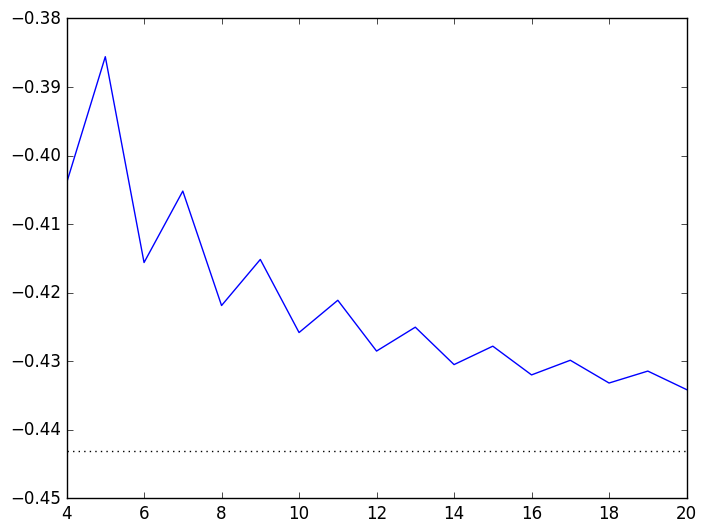

PyObject <matplotlib.lines.Line2D object at 0x7f17f7cc7a58>

In [2]:
using PyPlot
GSE = []
max = 20
Hn = getHkronsparse(max)
for k=4:max
    H = Hn[k]
    gse = eigs(H)[1][1] / k
    push!(GSE, gse)
end
    
plot(4:max, GSE)
plt[:axhline](1/4-log(2),c="k", ls=":")



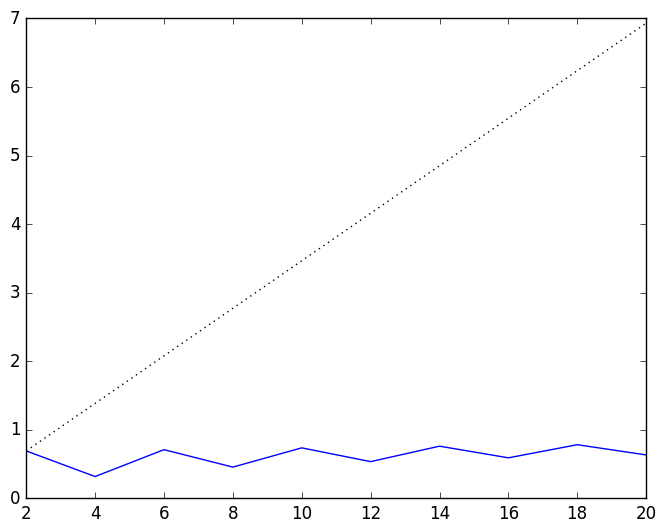

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f489bf37048>

In [23]:
S = []
x = 2:2:max
for k in x
    H = Hn[k]
    ev = eigs(H, nev=1)
    psi = ev[2][:,1]
#     println(ev[1][1]/k)
    size = round(Int, 2^(k/2))
    lambda = svdfact!(reshape(psi, size, size))[:S]
#     println(lambda)
    push!(S,sum(map(x -> - x^2 * log(x^2), lambda)))
end

plot(x, S)
plot(x, .5* x * log(2), c="k", ls=":")   

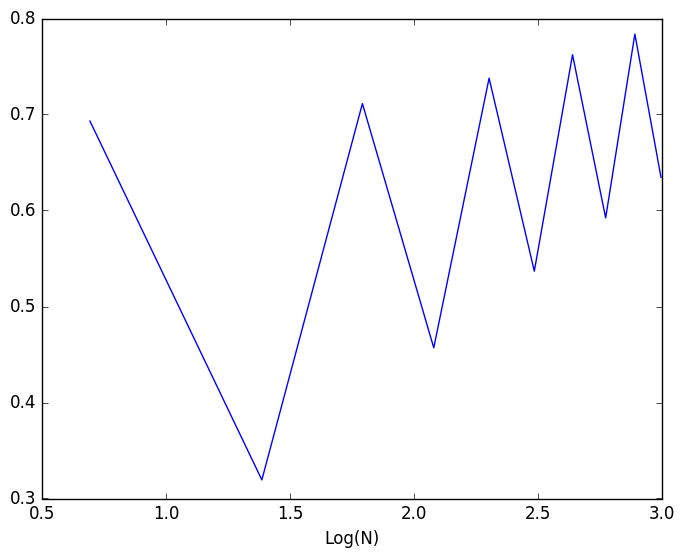

PyObject <matplotlib.text.Text object at 0x7ff068873128>

In [6]:
S = []
x = 2:2:max
for k in x
    H = Hn[k]
    ev = eigs(H, nev=1)
    psi = ev[2][:,1]
#     println(ev[1][1]/k)
    size = round(Int, 2^(k/2))
    lambda = svdfact!(reshape(psi, size, size))[:S]
#     println(lambda)
    push!(S,sum(map(x -> - x^2 * log(x^2), lambda)))
end

plot(log(x), S)
plt[:xlabel]("Log(N)")
# plot(x, .5* x * log(2), c="k", ls=":")  

0.13594444690080887
0.04523846720215783
0.1187712732965947


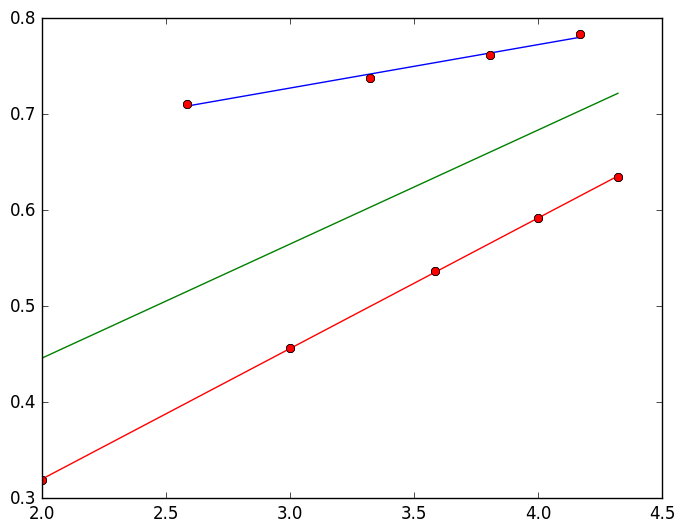

In [27]:
x = log2(4:4:max)
y = S[2:2:end]
a = CurveFit.linear_fit(x, y)
y0b = a[1] .+ a[2] .* x 
plot(x, y, "o", x, y0b, "r-", linewidth=1)
println(a[2])

x = log2(6:4:max)
y = S[3:2:end]
a = CurveFit.linear_fit(x, y)
y0b = a[1] .+ a[2] .* x 
plot(x, y, "o", x, y0b, "b-", linewidth=1)
println(a[2])

x = log2(4:2:max)
y = S[2:end]
a = CurveFit.linear_fit(x, y)
y0b = a[1] .+ a[2] .* x 
plot(x, y, "o", x, y0b, "g-", linewidth=1)
println(a[2])

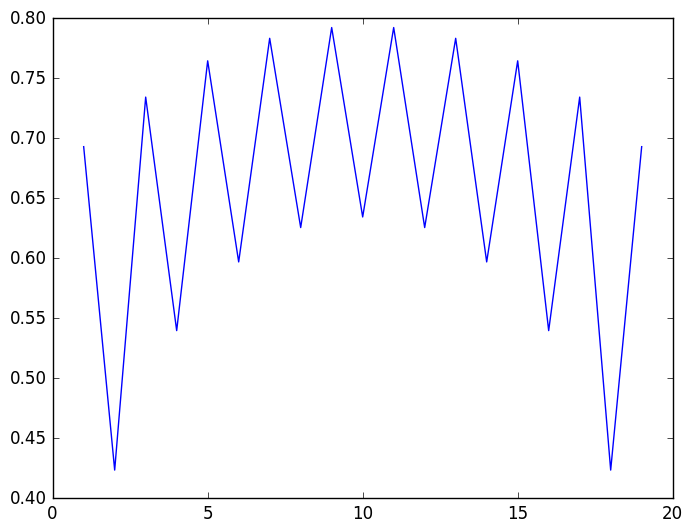

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f489bca68d0>

In [31]:
S = []
H = Hn[max]
ev=eigs(H, nev=1)
psi = ev[2][:,1]
for k= 1:max-1
    size1 = round(Int, 2^(k) )
    size2 = round(Int, 2^(max-k) )
    lambda = svdfact(reshape(psi, size1, size2))[:S]
    push!(S,sum(map(x -> - x^2 * log(x^2), lambda)))
end

plot(1:max-1, S)
    

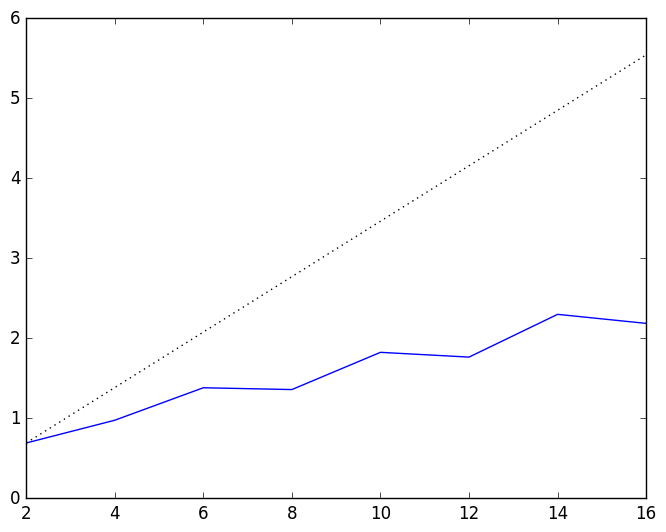

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd75dfc12e8>

In [4]:
# S = []
# H = Hn[12]
# ev=eigs(H, nev=6,sigma=-.26)
# psi = ev[2][:,1]

S = []
x = 2:2:16
for k in x
    H = Hn[k]
    ev = eigs(H, nev=1, sigma=-.25 *k)
    psi = ev[2][:,1]
#     println(ev[1][1]/k)
    size = round(Int, 2^(k/2))
    lambda = svdfact!(reshape(psi, size, size))[:S]
#     println(lambda)
    push!(S,sum(map(x -> - x^2 * log(x^2), lambda)))
end

plot(x, S)
plot(x, .5* x * log(2), c="k", ls=":") 

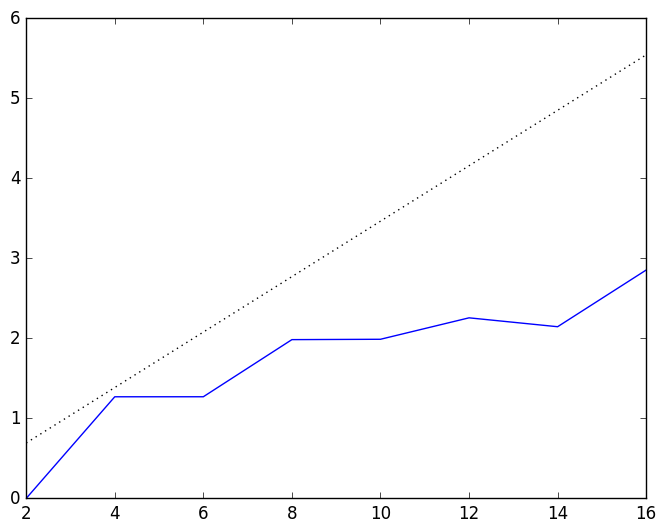

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f489bc43588>

In [39]:
S = []
x = 2:2:16
for k in x
    H = Hn[k]
    ev = eigs(H, nev=1, sigma=0)
    psi = ev[2][:,1]
#     println(ev[1][1]/k)
    size = round(Int, 2^(k/2))
    lambda = svdfact!(reshape(psi, size, size))[:S]
#     println(lambda)
    push!(S,sum(map(x -> - x^2 * log(x^2), lambda)))
end

plot(x, S)
plot(x, .5* x * log(2), c="k", ls=":") 

-0.7499999999998994
-0.25
-0.25
-0.21703479518696187
-0.2522603772588816
-0.25342773859511386
-0.2500564388531668
-0.24946885229313964
Any[0.6931471805599452,0.6931471805599452,1.2554798914521834,1.81950689383324,1.7035541328000108,2.785479526833684,2.427652625198445,3.287364901076776]


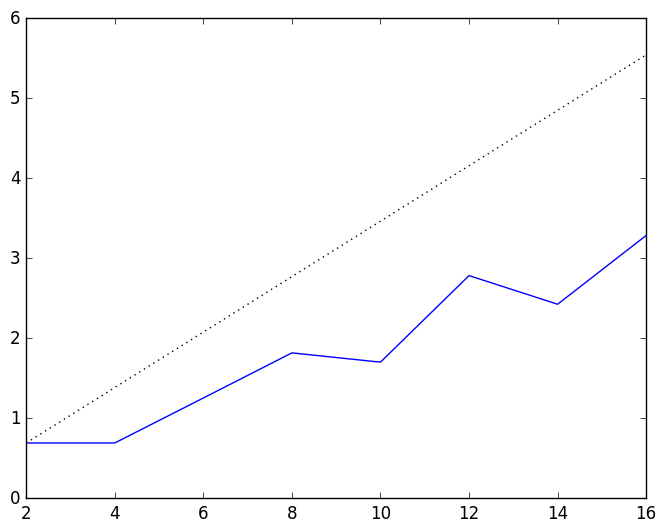

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd75f7d97b8>

In [3]:
S = []
x = 2:2:16
Hn = getHkronsparse(16)
for k in x
    H = Hn[k]
    ev = eigs(H, nev=1, sigma=-.2501)
    psi = ev[2][:,1]
    println(ev[1][1])
    size = round(Int, 2^(k/2))
    lambda = svdfact!(reshape(psi, size, size))[:S]
#     println(lambda)
    push!(S,sum(map(x -> - x^2 * log(x^2), lambda)))
end

println(S)
plot(x, S)
plot(x, .5* x * log(2), c="k", ls=":") 

-0.9571067811865464
-1.4214615413885896
-2.056757601771845
-2.5858046700259893
Any[0.6931471805599452,1.3143265735851823,1.3803620672350272,1.7020784174913595]


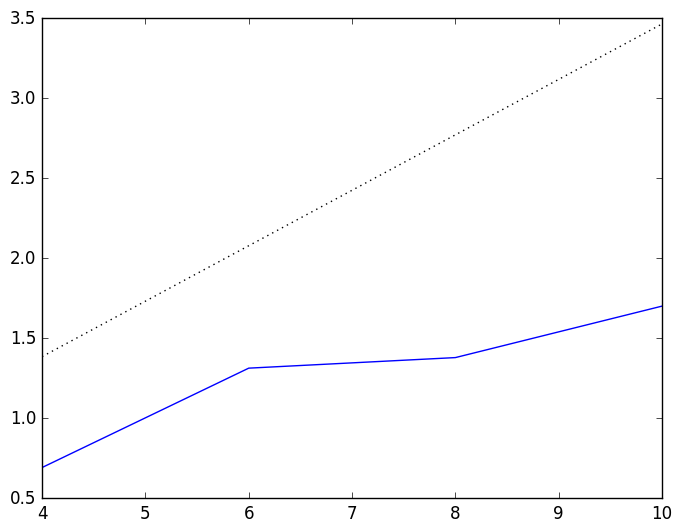

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd75d7a9fd0>

In [65]:
sz = Float64[0.5 0; 
	     0 -0.5]
sp = Float64[0 1; 
	     0 0]
sm = sp'
one = eye(2)
# ev = cell(100)

Hn = cell(100)
Htwon = cell(100)
function getHkron(n)
    Hn[2] = 0.5 * (kron(sp,sm) + kron(sm,sp)) + kron(sz,sz)
    Htwon[2] = Hn[2]
    for k=3:n
	Htwon[k] = kron(one,Htwon[k-1])
	Hn[k] = kron(Hn[k-1],one) + Htwon[k]
    end
    Hn
end
max = 10
Hn = getHkron(max)

S = []
list = 4:2:max

for k in list
    H = Hn[k]
    ev = eigfact(H)
#     println(ev[:values])
    index = findfirst(x -> abs(x+ k* 0.25) < 0.1, ev[:values])
    println(ev[:values][index])
    psi = ev[:vectors][:,index]
    size = round(Int, 2^(k/2))
    lambda = svdfact!(reshape(psi, size, size))[:S]
    lambda = lambda[find(lambda)]
    push!(S,sum(map(x -> - x^2 * log(x^2), lambda)))
end

println(S)
plot(list, S)
plot(list, .5* list * log(2), c="k", ls=":") 

[2.0,-0.0]
0.125
[8.0,1.270794586450699]
0.029006350946109788
[38.0,1.5805383739412995]
0.06372619128250258
[126.0,1.9851793550375112]
-0.001941887811736931
[442.0,2.4444669199778373]
-0.01323442767814056


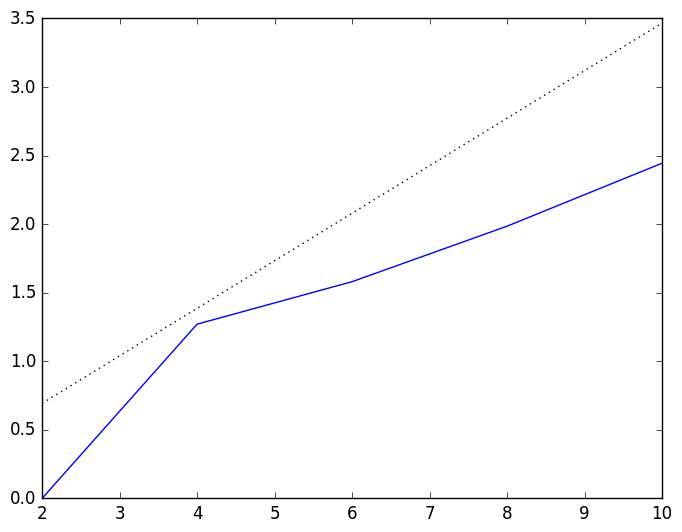

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd75d0c1438>

In [130]:
S=[]
max = 10
list = 2:2:max
for k in list
    H = Hn[k]
    ev = eigfact(H)
    S_site = []
    size = round(Int, 2^(k/2))
    #     println(ev[:values])
    #     println(ev[:values][index])
    for i in 2^(k-1)-round(Int,2.0^(k-3)) : 2^(k-1)+round(Int,2.0^(k-3)) 
        psi = ev[:vectors][:,i]
        lambda = (svdfact(reshape(psi, size, size))[:S])
        lambda = lambda[find(lambda)]
    #     println(lambda)
        push!(S_site,sum(map(x -> - x^2 * log(x^2), lambda)))
    end

# println(S)
# println(ev[:values])
    index = round(Int,findmax(S_site)[2]+ 2^(k-1)-2.0^(k-3)-1)
    println([index,maximum(S_site)])
    println(ev[:values][index]/(k))
#     println(maximum(S_site))
    push!(S,maximum(S_site))
end
plot(list, S)
plot(list, .5* list * log(2), c="k", ls=":") 